## Data Acquisition

Here we download the data from `tdcommons.ai` that we're going to use. I have decided to go with the `AMES Mutagenicity` dataset.

**Data description**: Mutagenicity means the ability of a drug to induce genetic alterations. Drugs that can cause damage to the DNA can result in cell death or other severe adverse effects. Nowadays, the most widely used assay for testing the mutagenicity of compounds is the Ames experiment which was invented by a professor named Ames. The Ames test is a short-term bacterial reverse mutation assay detecting a large number of compounds which can induce genetic damage and frameshift mutations. The dataset is aggregated from four papers.


The Ames test is a widely used method to determine whether a chemical can cause mutations in DNA. This is crucial in drug development since compounds that damage DNA can lead to cancer or other severe health issues.

In [2]:
import os
import sys

# Add the project root to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

### Dataset Details:
- **Task Type**: Binary classification (Mutagenic[1] or Non-mutagenic[0])
- **Prediction**: Whether a compound can cause genetic mutations
- **Size**: Typically contains around 7200 compounds
- **Features**: Molecular structures represented as SMILES strings
- **Target**: Binary classification (1 for Mutagenic, 0 for Non-mutagenic)

### Loading the dataset

We can check which datasets are available in TDC by running the following code:

In [4]:
from scripts.fetch_dataset import list_available_datasets

list_available_datasets()

Available ADME datasets:
- lipophilicity_astrazeneca
- solubility_aqsoldb
- hydrationfreeenergy_freesolv
- caco2_wang
- hia_hou
- pgp_broccatelli
- bioavailability_ma
- vdss_lombardo
- cyp2c19_veith
- cyp2d6_veith
- cyp3a4_veith
- cyp1a2_veith
- cyp2c9_veith
- cyp2c9_substrate_carbonmangels
- cyp2d6_substrate_carbonmangels
- cyp3a4_substrate_carbonmangels
- bbb_martins
- ppbr_az
- half_life_obach
- clearance_hepatocyte_az
- clearance_microsome_az

Available Toxicity datasets:
- tox21
- toxcast
- clintox
- herg
- herg_central
- dili
- skin_reaction
- ames
- carcinogens_lagunin
- ld50_zhu


### Download the dataset

Now we download the `AMES` dataset from the Tox group.

The script `download_dataset.py` will download the dataset and save it to the `data` folder with the following files:

- `AMES_train.csv`
- `AMES_valid.csv`
- `AMES_test.csv`
- `AMES_full.csv`


In [5]:
from scripts.fetch_dataset import download_dataset

download_dataset(dataset_name="AMES", dataset_group="Tox")

Found local copy...
Loading...
Done!


Dataset saved to /home/nyagah/Code/personal/ersilia-os-outreachy-contributions/data
Files created:
- /home/nyagah/Code/personal/ersilia-os-outreachy-contributions/data/AMES_train.csv
- /home/nyagah/Code/personal/ersilia-os-outreachy-contributions/data/AMES_valid.csv
- /home/nyagah/Code/personal/ersilia-os-outreachy-contributions/data/AMES_test.csv
- /home/nyagah/Code/personal/ersilia-os-outreachy-contributions/data/AMES_full.csv


('/home/nyagah/Code/personal/ersilia-os-outreachy-contributions/data/AMES_train.csv',
 '/home/nyagah/Code/personal/ersilia-os-outreachy-contributions/data/AMES_valid.csv',
 '/home/nyagah/Code/personal/ersilia-os-outreachy-contributions/data/AMES_test.csv',
 '/home/nyagah/Code/personal/ersilia-os-outreachy-contributions/data/AMES_full.csv')

Let's visualize the full Ames dataset to see the class distribution.

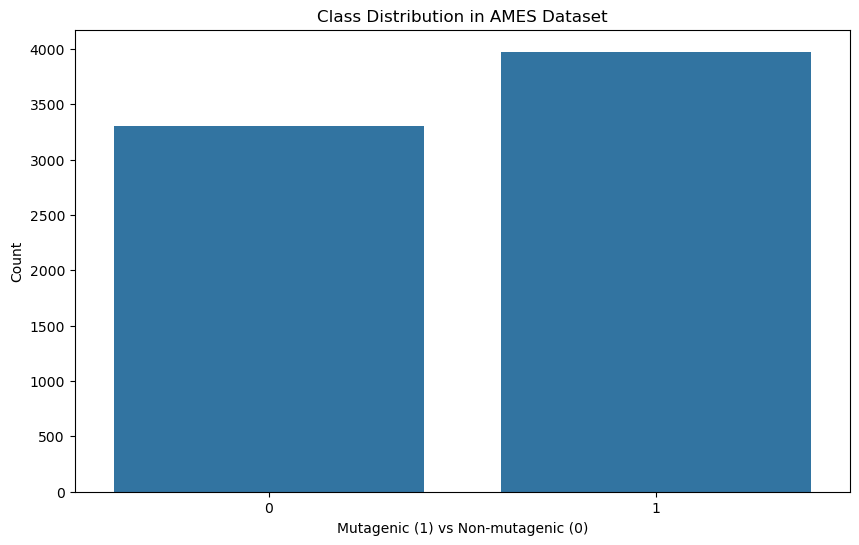

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

ames_full_df = pd.read_csv("../data/AMES_full.csv")

plt.figure(figsize=(10, 6))
sns.countplot(x="Y", data=ames_full_df)
plt.title("Class Distribution in AMES Dataset")
plt.xlabel("Mutagenic (1) vs Non-mutagenic (0)")
plt.ylabel("Count")
plt.show()
plt.savefig("../figures/ames_class_distribution.png")

## Featurization

Since there are no unique values to distinguish between mutagenic and non-mutagenic compounds, we will use Ersilia models to featurize the compounds. We can start with using `eos3b5e` to get the molecular weight of each compounds.

### 1. Molecular weight

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors

def calculate_mol_weight(df: pd.DataFrame) -> pd.DataFrame:
    mol_weights = []
    for smiles in df["Drug"]:
        mol = Chem.MolFromSmiles(smiles)
        mol_weight = Descriptors.MolWt(mol)
        mol_weights.append(mol_weight)

    df["MolWeight"] = mol_weights
    return df

In [ ]:
ames_full_df = calculate_mol_weight(ames_full_df)
ames_test_df = calculate_mol_weight(ames_test_df)
ames_train_df = calculate_mol_weight(ames_train_df)
ames_valid_df = calculate_mol_weight(ames_valid_df)

In [ ]:
ames_full_df.head()

## Create our model